# Visão Humana e Cores

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

### Luz

In [2]:
def plot_luz():
    fig_luz, ax = plt.subplots(1,1,figsize=(7,3), dpi = 100)

    def update_luz(f=5, s=100, p=1):
        ax.clear()
        x = np.arange(s)
        y = np.sin(p + 2 * np.pi * f * x/s)
        ax.plot(x,y)

    def plotluz(frequency,samples, phase):
        update_luz(f=frequency,s=samples, p=phase)

    interact(plotluz, frequency=(0,10,1), samples=(10,110,10),phase=(0,10,1));

<IPython.core.display.Javascript object>


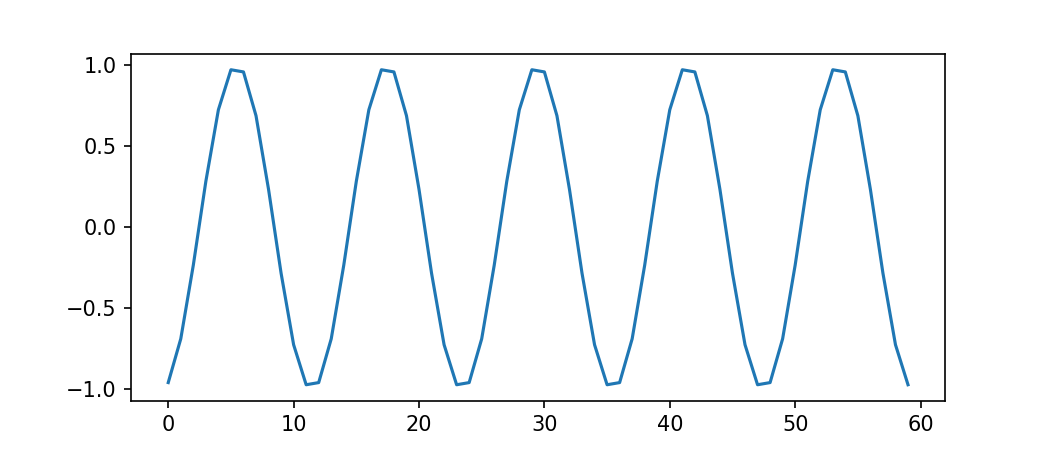

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J2ZyZXF1ZW5jeScsIG1heD0xMCksIEludFNsaWRlcih2YWx1ZT02MCwgZGVzY3JpcHRpb249dSfigKY=


In [3]:
plot_luz()

### Cores

In [4]:
from matplotlib.colors import *

hsv_canvas = np.zeros((200,200,3), dtype=np.float32)
rgb_canvas = np.zeros((200,200,3), dtype=np.uint8)

slider_hue = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv = [slider_hue,slider_sat,slider_val]
group_rgb = [slider_red, slider_green, slider_blue]

box_hsv = Box(children=group_hsv, layout=box_layout)
box_rgb = Box(children=group_rgb, layout=box_layout)

def update_colors_hsv(h,s,v):
    hsv_canvas[:,:,:] = h,s,v
    
def update_colors_rgb(r,g,b):
    rgb_canvas[:,:,:] = r,g,b

vb_hsv=VBox([box_hsv])
vb_rgb=VBox([box_rgb])

update_colors_hsv(.5,.5,.5)
update_colors_rgb(120,120,120)

In [5]:
def colors_plots_interact():
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=2)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    axes[0].imshow(hsv_to_rgb(hsv_canvas))
    axes[1].imshow(rgb_canvas)
    plt.tight_layout()
    def plotcolors_hsv(args):
        update_colors_hsv(h=slider_hue.value,s=slider_sat.value, v=slider_val.value)
        axes[0].imshow(hsv_to_rgb(hsv_canvas))

    def plotcolors_rgb(args):
        update_colors_rgb(r=slider_red.value,g=slider_green.value,b=slider_blue.value)
        axes[1].imshow(rgb_canvas)

    for s in group_hsv:
        s.observe(plotcolors_hsv, names='value')

    for s in group_rgb:
        s.observe(plotcolors_rgb, names='value')

    display(HBox([vb_hsv, vb_rgb]))


<IPython.core.display.Javascript object>


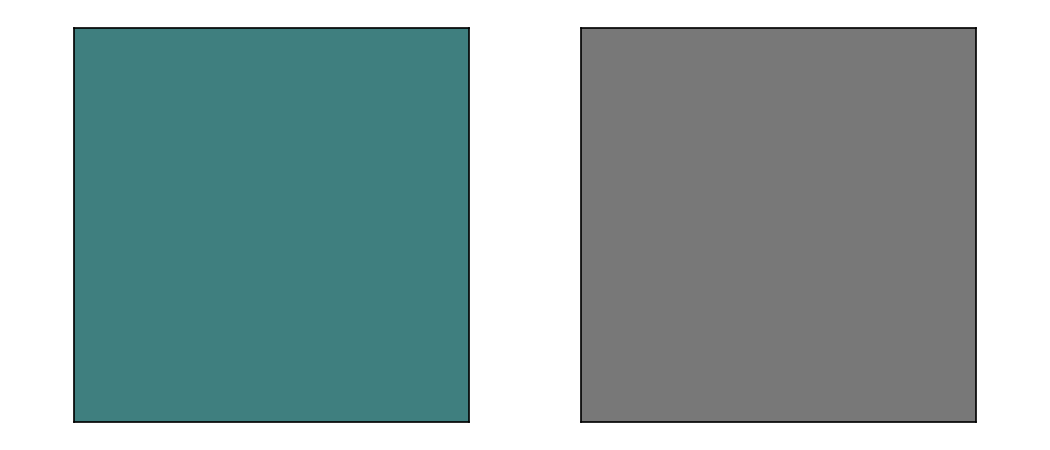

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [6]:
colors_plots_interact()

<IPython.core.display.Javascript object>


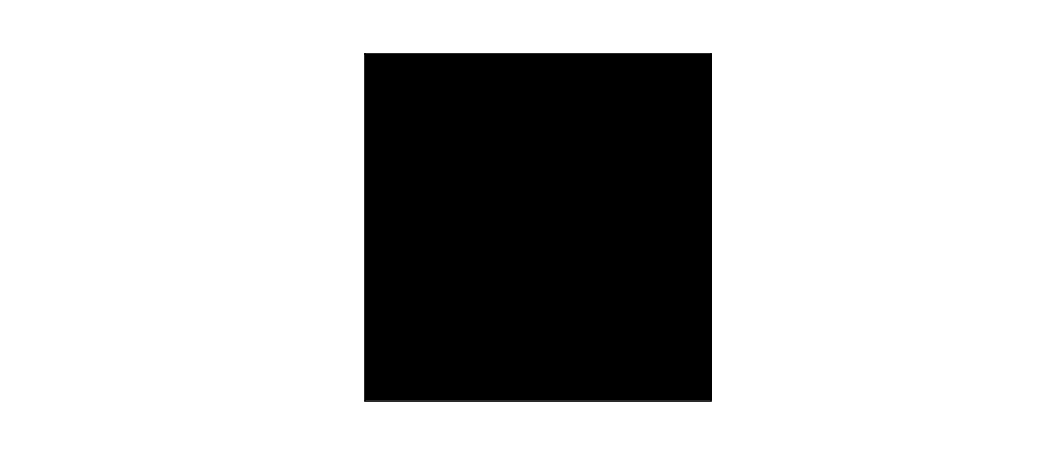

SEJveChjaGlsZHJlbj0oVkJveChjaGlsZHJlbj0oQm94KGNoaWxkcmVuPShGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXUnSHVlJywgbWF4PTEuMCksIEZsb2F0U2xpZGVyKHbigKY=


In [7]:
slider_hue_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Hue')
slider_sat_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Saturation')
slider_val_link = FloatSlider(min=0,max=1,step=.1,value=.5,description='Value')

slider_red_link = IntSlider(min=0,max=255,step=10,value=125,description='Red')
slider_green_link = IntSlider(min=0,max=255,step=10,value=125,description='Green')
slider_blue_link = IntSlider(min=0,max=255,step=10,value=125,description='Blue')

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='flex-end',
                    width='100%',
                    overflow_x='unset')

group_hsv_link = [slider_hue_link,slider_sat_link,slider_val_link]
group_rgb_link = [slider_red_link, slider_green_link, slider_blue_link]

box_hsv_link = Box(children=group_hsv_link, layout=box_layout)
box_rgb_link = Box(children=group_rgb_link, layout=box_layout)

vb_hsv_link=VBox([box_hsv_link])
vb_rgb_link=VBox([box_rgb_link])

def colors_link_interact():
    fig, ax = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=1)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     
    linked_canvas = np.zeros((200,200,3), dtype=np.uint8)
    linked_canvas_hsv = np.zeros((200,200,3), dtype=np.float32)
    ax.imshow(linked_canvas_hsv)
    
    def plotcolors_hsv(args):    
        linked_canvas_hsv[:,:,:] = slider_hue_link.value,slider_sat_link.value, slider_val_link.value
        ax.imshow(hsv_to_rgb(linked_canvas_hsv))
        r,g,b = hsv_to_rgb(linked_canvas_hsv)[100,100] * 255
        slider_red_link.value = r.astype(np.uint8)
        slider_green_link.value = g.astype(np.uint8)
        slider_blue_link.value = b.astype(np.uint8)

    for s in group_hsv_link:
        s.observe(plotcolors_hsv, names='value')

    display(HBox([vb_hsv_link, vb_rgb_link]))
    
colors_link_interact()

### Imagem Digital

#### Imagem Binária - 2 valores

In [8]:
random_imagem_pb = np.random.randint(0,size=(15,15),high=2)
print random_imagem_pb

[[1 0 0 1 1 1 0 1 0 1 1 1 1 0 0]
 [0 1 1 0 0 1 0 0 0 0 1 1 1 1 1]
 [0 0 1 0 0 1 1 0 1 1 0 1 1 1 0]
 [0 0 1 0 0 0 0 1 1 0 1 1 1 1 0]
 [0 1 1 0 0 1 0 1 1 0 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 1 1 0 0 0 1 0]
 [1 0 0 1 0 1 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 0 1 0 1 0 1]
 [0 0 1 1 1 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 1 1 1 0 1 1 1 1 1]
 [0 1 0 1 1 1 1 0 0 0 0 1 0 1 0]
 [1 1 0 0 0 1 1 1 1 0 1 0 0 1 1]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 1 0 1 1 0 1 0 1]]


In [9]:
random_imagem_cinza = np.random.randint(0,size=(15,15),high=256)
print random_imagem_cinza.view(type=np.matrix)

[[182  34 106 216  61 155  79  37  50  49 174  90 227   8  12]
 [219  75 169 232  99 192  12 179 194  53  88 115 148  64  10]
 [  9 200  63 106  57 143  84  49 243 100  47 144  70 180 206]
 [ 77 155 244 127  77 193 122 194 195  74 137  40 100 135 131]
 [ 60 166 154  13 184  29  47  48 191 134  62 232 232  30 180]
 [ 83  79 226  90  69  50 160  89 108 107 180  68  35  51 247]
 [ 16  88 137 144 247 222 223 192 197 171 125 212 218 157  21]
 [204 188  51 242 101  43 219 185  73 151  65 206  97   7  98]
 [ 81 185 232 215 165 217  16   4 118  96 143  53  51 141   2]
 [ 86  59  58  72 250 139 125 100  50  36 160 109 134 253  54]
 [ 83 247  13 149  82  60 197 122 151 251 134 243  34 229 142]
 [164  64  30 202 220 248 201 168 161  69  49  34  28  69 130]
 [ 18  21 170  35 229 137 100 248  61 227  38 142 131   1 199]
 [ 18 140  21 151  93 187 167  59  76 184 122  79  49 111 230]
 [ 22 102 158 132  25 247 163 124 126  89  42  58 111  53 139]]


In [10]:
random_imagem_color = np.random.randint(0,size=(3,3,3),high=256)
print random_imagem_color

[[[232 182 231]
  [174 237  22]
  [ 25  65   8]]

 [[ 37 189 240]
  [219 246 236]
  [106 173 197]]

 [[100  52 113]
  [165 146 198]
  [ 71 254 129]]]


In [11]:
def mostrar_imagens(path):
    fig, axes = plt.subplots(figsize=(7,3), dpi = 100, nrows=1, ncols=3)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    colorida = cv2.imread(path,1) # 1 colorida
    cinza = cv2.imread(path,0) # 0 escala de cinza
    newimg = cv2.cvtColor(colorida, cv2.COLOR_BGR2HSV)
    newimg[:,:,0] = newimg[:,:,0] + 10
    
    thresh, pb = cv2.threshold(cinza, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    axes[0].imshow(cv2.cvtColor(colorida, cv2.COLOR_BGR2RGB))
    axes[1].imshow(cinza,cmap='gray')
    axes[2].imshow(pb,cmap='gray')

<IPython.core.display.Javascript object>


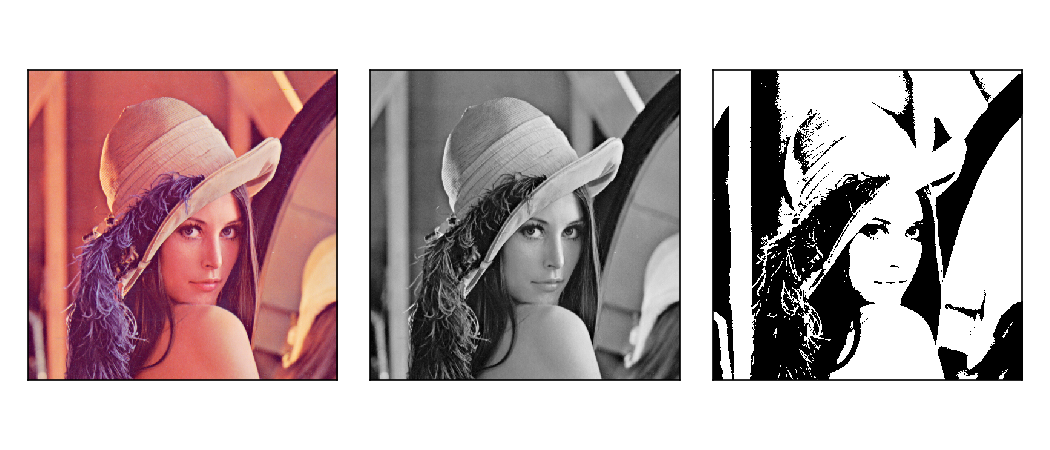

In [12]:
mostrar_imagens('dataset/lenna.png')

### Amostragem

In [17]:
def desenha_grid(img, grid_n):
    rows_n = np.linspace(0, img.shape[0], grid_n)
    cols_n = np.linspace(0, img.shape[1], grid_n)
    
    for i in rows_n:
        cv2.line(img, (int(i), 0), (int(i), img.shape[1]), (0,0,0), 3)
    for j in cols_n:
        cv2.line(img, (0, int(j)), (img.shape[0], int(j)), (0,0,0), 3)

def mostrar_amostragem(caminho):
    
    fig, axes = plt.subplots(figsize=(5,2), dpi = 200, nrows=1, ncols=3)
    img = cv2.cvtColor(cv2.imread(caminho,1),cv2.COLOR_BGR2RGB)
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    
    def update(args):
        v = args['new']
        axes[0].imshow(img)
        grid = np.copy(img)
        desenha_grid(grid, v)
        axes[1].imshow(grid)
        axes[2].imshow(cv2.resize(img,(v,v)))
    
    update({'new':20})
    slider = IntSlider(min=5,max=50,step=5,value=10,description='Tamanho')
    #slider_quantization = IntSlider(min=3,max=255,step=20,value=255,description='Profundidade')
    slider.observe(update, names='value')
    display(slider)

<IPython.core.display.Javascript object>


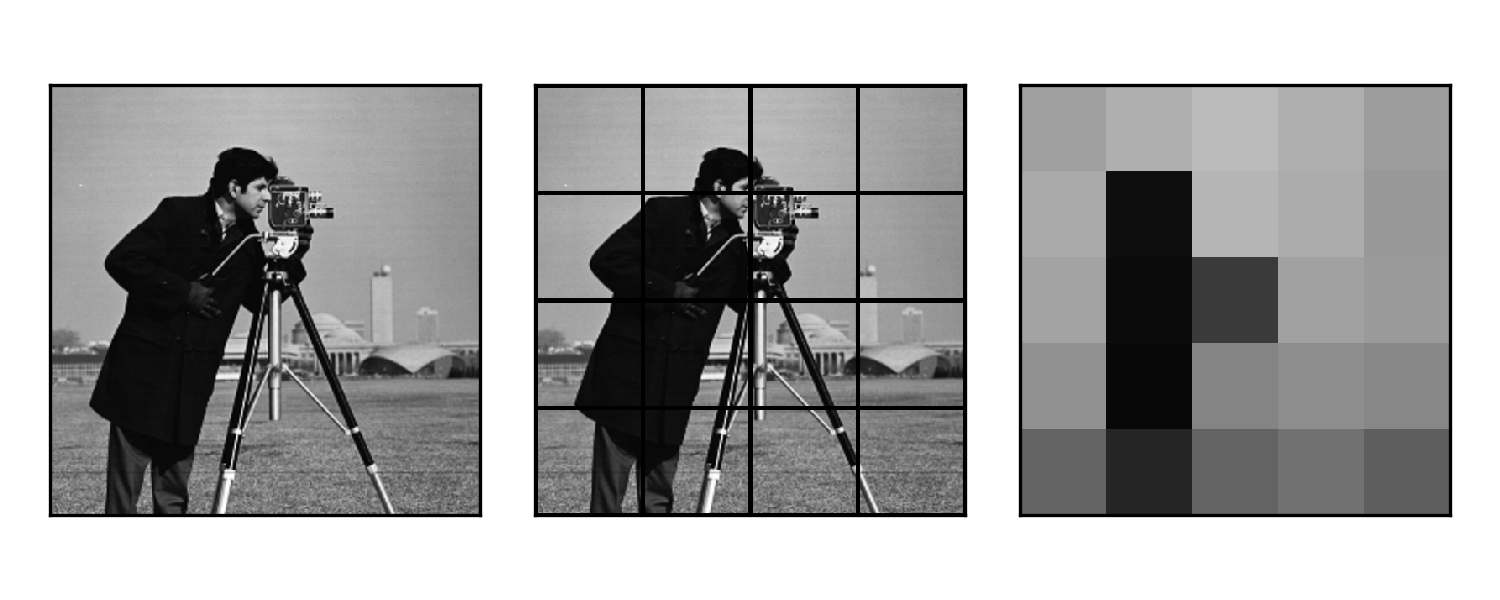

IntSlider(value=10, description=u'Tamanho', max=50, min=5, step=5)

In [18]:
mostrar_amostragem('dataset/cameraman.tif')